# Klastrowanie
Czym jest klastrowanie? Według definicji to grupowanie obserwacji w taki sposób, że obserwacje wewnątrz grupy są pod pewnym względem bardziej podobne do siebie niż pomiędzy grupami. Jak wiemy w przypadku analizy danych przez podobieństwo mamy zwykle na myśli odległość (dystans), który również możemy mierzyć na kilka sposobów.

## Podobieństwo - bliskość.
Zastanówmy się co to znaczy, że dwie obserwacje są do siebie podobne. Można to sparafrazować mowiąc że dwa punkty leżące w wielowymiarowej przestrzeni leżą blisko siebie. Właśnie odległość, w euklideosym rozumieniu geometrii to podstawowa miara odległości punktów. Dla dwóch punktów $i$ i $j$ dana będzie wzorem.
$$d_e(i,j) = \sqrt{(x_{1i} - x_{1j})^2 + (x_{2i} - x_{2j})^2 + \ldots + (x_{pi} - x_{pj})^2}$$

Podobnie jak w przypadku funkcji straty mozemy się zastanawiac nad zasadnością podnoszenia różnic do kwadratu oraz ich późniejszego pierwiastkowania. Alternatywną funkcją odległości jest *Manhatan distance* (zwany też *City distance*).

$$d_c(i,j) = |x_{1i} - x_{1j}| + |x_{2i} - x_{2j}| + \ldots + |x_{pi} - x_{pj}|$$

Obydwie powyższe mairy można uogólnić w postaci dystansu Minkowskiego:
$$d_M(i,j, \lambda) = \left(|x_{1i} - x_{1j}|^\lambda + |x_{2i} - x_{2j}|^\lambda + \ldots + |x_{pi} - x_{pj}|^\lambda\right)^{1/\lambda}$$

Przy $\lambda$ dążącym do nieskończoności otrzymujemy tzn dystans Chebysheva. Różnice pomiędzy poszczególnymi miarami mozna zwizualizować w nastepujący sposób.
![distances](img/distances.png)
Źródło: https://lyfat.wordpress.com/2012/05/22/euclidean-vs-chebyshev-vs-manhattan-distance/


## Grupowanie w praktyce
Nawet jeżeli bardzo intuicyjnie rozumiemy miarę dystansu i nie pracujemy w wielowymiarowej przestrzeni, a jedynie w dwóch wymiarach odpowiedź na pytanie czym jest grupa (klaster) nie jest oczywista.

Spójrzmy na poniższy przykład:

![distances](img/clustering.png)
Źródło: http://scikit-learn.org/stable/modules/clustering.html

Powyższa grafika operuje na sztucznie wygenerowanych przykładach, które doskonale pełnią dwie role:
* Pokazują, jak dużym problemem może być stwierdzenie czym ma być grupa/klaster.
* Pokazują w jaki sposób działają poszczególne algorytmy klastrowania.

<table border="1" class="colwidths-given docutils">
<colgroup>
<col width="15%" />
<col width="16%" />
<col width="20%" />
<col width="27%" />
<col width="22%" />
</colgroup>
<thead valign="bottom">
<tr class="row-odd"><th class="head">Method name</th>
<th class="head">Parameters</th>
<th class="head">Scalability</th>
<th class="head">Usecase</th>
<th class="head">Geometry (metric used)</th>
</tr>
</thead>
<tbody valign="top">
<tr class="row-even"><td>K-Means</td>
<td>number of clusters</td>
<td>Very large <code class="docutils literal"><span class="pre">n_samples</span></code>, medium <code class="docutils literal"><span class="pre">n_clusters</span></code></td>
<td>General-purpose, even cluster size, flat geometry, not too many clusters</td>
<td>Distances between points</td>
</tr>
<tr class="row-odd"><td>Affinity propagation</td>
<td>damping, sample preference</td>
<td>Not scalable with n_samples</td>
<td>Many clusters, uneven cluster size, non-flat geometry</td>
<td>Graph distance (e.g. nearest-neighbor graph)</td>
</tr>
<tr class="row-even"><td>Mean-shift</td>
<td>bandwidth</td>
<td>Not scalable with <code class="docutils literal"><span class="pre">n_samples</span></code></td>
<td>Many clusters, uneven cluster size, non-flat geometry</td>
<td>Distances between points</td>
</tr>
<tr class="row-odd"><td>Spectral clustering</td>
<td>number of clusters</td>
<td>Medium <code class="docutils literal"><span class="pre">n_samples</span></code>, small <code class="docutils literal"><span class="pre">n_clusters</span></code></td>
<td>Few clusters, even cluster size, non-flat geometry</td>
<td>Graph distance (e.g. nearest-neighbor graph)</td>
</tr>
<tr class="row-even"><td>Ward hierarchical clustering</td>
<td>number of clusters</td>
<td>Large <code class="docutils literal"><span class="pre">n_samples</span></code> and <code class="docutils literal"><span class="pre">n_clusters</span></code></td>
<td>Many clusters, possibly connectivity constraints</td>
<td>Distances between points</td>
</tr>
<tr class="row-odd"><td>Agglomerative clustering</td>
<td>number of clusters, linkage type, distance</td>
<td>Large <code class="docutils literal"><span class="pre">n_samples</span></code> and <code class="docutils literal"><span class="pre">n_clusters</span></code></td>
<td>Many clusters, possibly connectivity constraints, non Euclidean
distances</td>
<td>Any pairwise distance</td>
</tr>
<tr class="row-even"><td>DBSCAN</td>
<td>neighborhood size</td>
<td>Very large <code class="docutils literal"><span class="pre">n_samples</span></code>, medium <code class="docutils literal"><span class="pre">n_clusters</span></code></td>
<td>Non-flat geometry, uneven cluster sizes</td>
<td>Distances between nearest points</td>
</tr>
<tr class="row-odd"><td>Gaussian mixtures</td>
<td>many</td>
<td>Not scalable</td>
<td>Flat geometry, good for density estimation</td>
<td>Mahalanobis distances to  centers</td>
</tr>
<tr class="row-even"><td>Birch</td>
<td>branching factor, threshold, optional global clusterer.</td>
<td>Large <code class="docutils literal"><span class="pre">n_clusters</span></code> and <code class="docutils literal"><span class="pre">n_samples</span></code></td>
<td>Large dataset, outlier removal, data reduction.</td>
<td>Euclidean distance between points</td>
</tr>
</tbody>
</table>
Źródło: http://scikit-learn.org/stable/modules/clustering.html


Wśród wielu algorytmów klastrujących na szczególną uwagę zaslugują najprawdopodobniej k-NN, agglomerative clustering oraz dbscan, ze względu na ich dobrą skalowalność oraz zupełnie odmienne podejście do grupowania.

### k-NN
* Liczba klastrów musi być określona z góry
* Każdy klaster posiada swój środek (centroid)
* Klastry tworzone są tak aby suma odległości obserwacji od przynależnego centroidu byłą jak najmniejsza

### Agglomerative clustering
* Liczba klastrów musi być ręcznie określona, ale niekoniecznie z góry
* Istnieje wiele odmian (konfiguracji) w zależności od przyjętego sposobu łączenia.
* Początkowo każdy punkt jest oddzielnym klastrem. W każdej kolejnej iteracji dwa najbliższe sobie klastry są łączone w jeden.

### DBSCAN - density based
* Liczba klastrów dobierana jest endogenicznie
* Wymaga podania wyłącznie dwóch parametrów. Minimalnej gęstości określonej przez minimalną liczbę punktów w określonym obszarze.
* Pozwala na pozostawienie niepogrupowanych "obserwacji odstających"/ szumu.
* Potrafi tworzyć jednocześnie duże i małe klastry

Warto przeczytać:
* https://cs.wmich.edu/alfuqaha/summer14/cs6530/lectures/ClusteringAnalysis.pdf
* http://hdbscan.readthedocs.io/en/latest/performance_and_scalability.html


## Charakterystyki klastrowania
* Każdy algorytm klastrujący operuję pewną miarę dystansu. Z tego powodu wyniki sa bardzo wrażliwe na skalowanie i przetwarzanie danych.
* Żaden algorytm nie jest idealny, ze względu na to, że nie ma obiektywnej deifinicji klastra/grupy

Grafikę analogiczną do powyższej możemy wygenerować w następujący sposób:

/home/wilam/.local/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/home/wilam/.local/lib/python3.6/site-packages/sklearn/cluster/hierarchical.py:193: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  affinity='euclidean')
/home/wilam/.local/lib/python3.6/site-packages/sklearn/cluster/hierarchical.py:426: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  affinity=affinity)
/home/wilam/.local/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/home/wilam/.local/lib/pyth

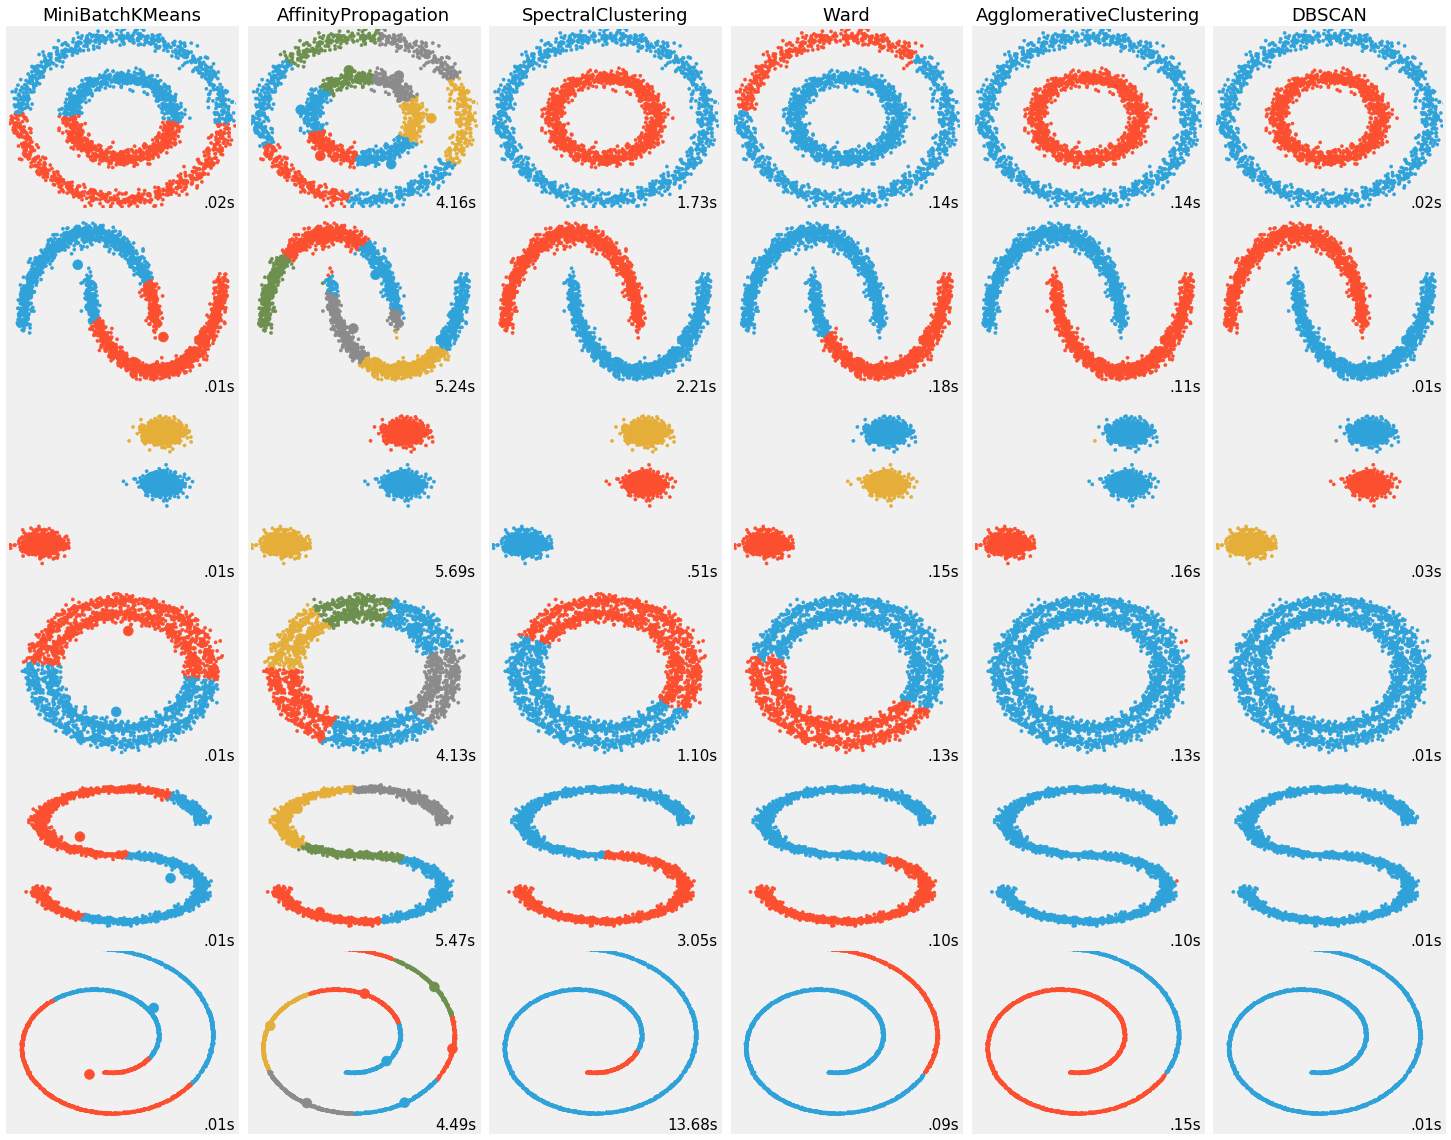

In [1]:
# Source: https://bugra.github.io/work/notes/2014-11-16/an-introduction-to-unsupervised-learning-scikit-learn/
# based on: http://scikit-learn.org/stable/modules/clustering.html
%matplotlib inline
import itertools
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import pandas as pd
import scipy


from sklearn import cluster
from sklearn import datasets
from sklearn import metrics
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
import time

np.random.seed(0)

n_samples = 2500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
circles = datasets.make_circles(n_samples=n_samples, noise=.05)
s_curve = datasets.make_s_curve(n_samples=n_samples, noise=.05)
swiss_roll = datasets.make_swiss_roll(n_samples=n_samples, noise=.05)

s_curve = np.vstack((s_curve[0][:, 0], s_curve[0][:, 2])).T, None
swiss_roll = np.vstack((swiss_roll[0][:,0], swiss_roll[0][:,2])).T, None

data_samples = [
                noisy_circles, 
                noisy_moons, 
                blobs, 
                circles, 
                s_curve, 
                swiss_roll
               ]

colors = np.array([ii.strip() for ii in '#30a2da, #fc4f30, #e5ae38, #6d904f, #8b8b8b'.split(',')])
colors = np.hstack([colors] * 200)
plt.figure(figsize=(20, 16))

with plt.style.context('fivethirtyeight'):
    plt.subplots_adjust(left=.001, right=.999, bottom=.001, top=.96, wspace=.05,
                        hspace=.01)

    plot_num = 1
    for ii, dataset in enumerate(data_samples):
        X, y = dataset
        # normalize dataset for easier parameter selection
        X = StandardScaler().fit_transform(X)

        # estimate bandwidth for mean shift
        bandwidth = cluster.estimate_bandwidth(X, quantile=0.3)

        # connectivity matrix for structured Ward
        connectivity = kneighbors_graph(X, n_neighbors=10)
        # make connectivity symmetric
        connectivity = 0.5 * (connectivity + connectivity.T)

        # Compute distances
        distances = metrics.euclidean_distances(X)
        if ii == 2:
            n_clusters = 3
        else:
            n_clusters = 2
        # create clustering estimators
        ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
        two_means = cluster.MiniBatchKMeans(n_clusters=n_clusters)
        ward = cluster.AgglomerativeClustering(n_clusters=n_clusters,
                        linkage='ward', connectivity=connectivity)
        spectral = cluster.SpectralClustering(n_clusters=n_clusters,
                                              eigen_solver='arpack',
                                              affinity="nearest_neighbors")
        dbscan = cluster.DBSCAN(eps=.2)
        affinity_propagation = cluster.AffinityPropagation(damping=.9,
                                                           preference=-200)

        average_linkage = cluster.AgglomerativeClustering(linkage="average",
                                affinity="cityblock", n_clusters=n_clusters,
                                connectivity=connectivity)

        

        clustering_algos = [
                    ('MiniBatchKMeans', two_means),
                    ('AffinityPropagation', affinity_propagation),
        #           ('MeanShift', ms),
                    ('SpectralClustering', spectral),
                    ('Ward', ward),
                    ('AgglomerativeClustering', average_linkage),
                    ('DBSCAN', dbscan)
                   ]

        for name, algorithm in clustering_algos:
            # predict cluster memberships
            t0 = time.time()
            algorithm.fit(X)
            t1 = time.time()
            if hasattr(algorithm, 'labels_'):
                y_pred = algorithm.labels_.astype(np.int)
            else:
                y_pred = algorithm.predict(X)

            plt.subplot(len(clustering_algos), len(data_samples), plot_num)
            if ii == 0:
                plt.title(name, size=18)
            plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred].tolist(), s=10)

            if hasattr(algorithm, 'cluster_centers_'):
                centers = algorithm.cluster_centers_
                center_colors = colors[:len(centers)]
                plt.scatter(centers[:, 0], centers[:, 1], s=100, c=center_colors)
            plt.xlim(-2, 2)
            plt.ylim(-2, 2)
            plt.xticks(())
            plt.yticks(())
            plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                     transform=plt.gca().transAxes, size=15,
                     horizontalalignment='right')
            plot_num += 1

## Principal Component Analysis (PCA)
PCA to matemtyczna transofrmacja macierzy (z wykorzystaniem wektorów własnych) w taki sposób, aby jej kolejne wektory były względem siebie prostopadłe i kolejno tłumaczyły największą część obserwowanej wariancji.

Siłą rzeczy PCA jest podatne na skalowanie zmiennych. Z tego powodu 

In [2]:
import pandas as pd
import numpy as np
import pickle
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('seaborn-ticks')
%matplotlib inline
import pandas as pd
import numpy as np
import pickle
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('seaborn-ticks')
%matplotlib inline

comm = pd.read_csv("datasets/communities.csv", decimal=",")
# features = comm.columns.tolist()[4:-1]
# features = comm[features].isnull().sum().sort_values().index.tolist()[:-23]
print(comm.shape)
features = ['fold', 'PctHousOccup', 'HousVacant', 'MedNumBR', 'PctHousLess3BR', 'PctPersDenseHous', 'PctPersOwnOccup', 'PersPerRentOccHous', 'PersPerOwnOccHous', 'PersPerOccupHous', 'PctLargHouseOccup', 'PctLargHouseFam', 'PctNotSpeakEnglWell', 'LemasPctOfficDrugUn', 'PctRecImmig10', 'PctRecImmig8', 'PctRecImmig5', 'PctRecentImmig', 'PctImmigRec10', 'PctImmigRec8', 'PctImmigRec5', 'PctImmigRecent', 'PctHousOwnOcc', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctUsePubTrans', 'PopDens', 'LandArea', 'PctSameState85', 'PctSameCity85', 'PctSameHouse85', 'PctBornSameState', 'PctForeignBorn', 'NumStreet', 'NumInShelters', 'NumImmig', 'MedOwnCostPctIncNoMtg', 'MedRentPctHousInc', 'MedRent', 'RentHighQ', 'RentMedian', 'RentLowQ', 'OwnOccHiQuart', 'OwnOccMedVal', 'OwnOccLowQuart', 'PctWOFullPlumb', 'PctHousNoPhone', 'MedOwnCostPctInc', 'PctIlleg', 'PctSpeakEnglOnly', 'PctWorkMom', 'whitePerCap', 'perCapInc', 'medFamInc', 'pctWRetire', 'pctWPubAsst', 'pctWSocSec', 'pctWInvInc', 'pctWFarmSelf', 'NumIlleg', 'medIncome', 'blackPerCap', 'pctUrban', 'agePct65up', 'agePct16t24', 'agePct12t29', 'agePct12t21', 'householdsize', 'population', 'numbUrban', 'indianPerCap', 'pctWWage', 'FemalePctDiv', 'PctTeen2Par', 'PctKids2Par', 'PctFam2Par', 'PersPerFam', 'TotalPctDiv', 'PctYoungKids2Par', 'MalePctNevMarr', 'MalePctDivorce', 'PctOccupMgmtProf', 'PctWorkMomYoungKids', 'PctOccupManu', 'PctEmplManu', 'PctEmploy', 'PctUnemployed', 'PctBSorMore', 'PctNotHSGrad', 'PctLess9thGrade', 'PctPopUnderPov', 'NumUnderPov', 'HispPerCap', 'PctEmplProfServ', 'AsianPerCap']
print(len(features))
# comm[features] = comm[features].apply(lambda x: (x-x.mean())/x.std())
comm[features] = comm[features].apply(lambda x: (x-x.mean()))
comm["ViolentCrimesPerPopClass"] = (comm.ViolentCrimesPerPop > 0.46).astype(int)

(1994, 128)
96


/home/wilam/.local/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
commPCA = pca.fit(comm[features]).transform(comm[features])
dfPCA = pd.DataFrame(commPCA, columns=["v_"+str(x) for x in range(commPCA.shape[1])])
dfPCA["ViolentCrimesPerPopClass"]  = comm["ViolentCrimesPerPopClass"]

In [4]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.68815708 0.08531568 0.05723952 0.02618028 0.0234199  0.01508985
 0.01204595 0.00988352 0.00860829 0.00653431 0.00618956 0.00455767
 0.00424784 0.00398721 0.00352673 0.00331371 0.00284125 0.00244941
 0.00227886 0.00213495]
0.9680015537267205


In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=40)
commPCA2 = pca.fit(comm[features]).transform(comm[features])
dfPCA2 = pd.DataFrame(commPCA2, columns=["v_"+str(x) for x in range(commPCA2.shape[1])])
dfPCA2["ViolentCrimesPerPopClass"]  = comm["ViolentCrimesPerPopClass"]

In [6]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[6.88157077e-01 8.53156778e-02 5.72395170e-02 2.61802834e-02
 2.34198975e-02 1.50898482e-02 1.20459461e-02 9.88352182e-03
 8.60828997e-03 6.53431124e-03 6.18955645e-03 4.55767290e-03
 4.24785552e-03 3.98724268e-03 3.52673752e-03 3.31375988e-03
 2.84137889e-03 2.44985261e-03 2.28001380e-03 2.13695813e-03
 2.01960205e-03 1.99414956e-03 1.84850454e-03 1.58474713e-03
 1.52806055e-03 1.38721193e-03 1.31732264e-03 1.28864820e-03
 1.21918588e-03 1.15494350e-03 1.12919764e-03 1.06047420e-03
 9.53580373e-04 8.81605489e-04 7.79372596e-04 7.62726786e-04
 7.25451631e-04 6.67526233e-04 6.12492550e-04 6.01800017e-04]
0.9915220015490812


Alternatywnie możemy podać jaka część wariancji ma pozostać wyjaśniona, tak aby algorytm sam dobrał licbę komponentów.

In [7]:
pca = PCA(0.95)
commPCA = pca.fit(comm[features]).transform(comm[features])
pca.n_components_

14

Przygotujmy więc nasze zbiory tak aby tłumaczyły określoną część wariancji.

In [8]:
pca = PCA(0.95)
commPCA = pca.fit(comm[features]).transform(comm[features])
dfPCA = pd.DataFrame(commPCA, columns=["v_"+str(x) for x in range(commPCA.shape[1])])
dfPCA["ViolentCrimesPerPopClass"]  = comm["ViolentCrimesPerPopClass"]
print(pca.n_components_)


pca = PCA(0.99)
commPCA2 = pca.fit(comm[features]).transform(comm[features])
dfPCA2 = pd.DataFrame(commPCA2, columns=["v_"+str(x) for x in range(commPCA2.shape[1])])
dfPCA2["ViolentCrimesPerPopClass"]  = comm["ViolentCrimesPerPopClass"]
print(pca.n_components_)

14
38


Możemy sprawdzić czy korzystanie z przekształconych zmiennych pozwoli w łatwy sposób uzyskać lepsze wyniki predykcyjne na naszym zbiorze.

In [9]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import random
kf = KFold(n_splits=5, shuffle=True, random_state=random.randint(0,10000))

aucs = []
aucsT = []
for train, test in kf.split(comm.index.values):
    mod = sm.GLM.from_formula(formula="ViolentCrimesPerPopClass ~ "+"+".join(features), data=comm.iloc[train], family=sm.families.Binomial())
    res = mod.fit()
    predsTrain = res.predict()
    preds = res.predict(comm.iloc[test])
    print("Train AUC:", roc_auc_score(comm.iloc[train].ViolentCrimesPerPopClass, predsTrain), "Valid AUC:", roc_auc_score(comm.iloc[test].ViolentCrimesPerPopClass, preds))
    aucs.append(roc_auc_score(comm.iloc[test].ViolentCrimesPerPopClass, preds))
    aucsT.append(roc_auc_score(comm.iloc[train].ViolentCrimesPerPopClass, predsTrain))
print(np.mean(aucsT), np.mean(aucs))


Train AUC: 0.9443027516344565 Valid AUC: 0.90784031648984
Train AUC: 0.9363756350684338 Valid AUC: 0.9381203337725078
Train AUC: 0.9488508298613483 Valid AUC: 0.8872549019607843
Train AUC: 0.9502868349510003 Valid AUC: 0.8691434668736056
Train AUC: 0.9424894706614338 Valid AUC: 0.9057582179735763
0.9444611044353344 0.9016234474140628


In [10]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import random
kf = KFold(n_splits=5, shuffle=True, random_state=random.randint(0,10000))

aucs = []
aucsT = []
featPCA = dfPCA.columns.tolist()[0:-1]
for train, test in kf.split(dfPCA.index.values):
    mod = sm.GLM.from_formula(formula="ViolentCrimesPerPopClass ~ "+"+".join(featPCA), data=dfPCA.iloc[train], family=sm.families.Binomial())
    res = mod.fit()
    predsTrain = res.predict()
    preds = res.predict(dfPCA.iloc[test])
    print("Train AUC:", roc_auc_score(dfPCA.iloc[train].ViolentCrimesPerPopClass, predsTrain), "Valid AUC:", roc_auc_score(dfPCA.iloc[test].ViolentCrimesPerPopClass, preds))
    aucs.append(roc_auc_score(dfPCA.iloc[test].ViolentCrimesPerPopClass, preds))
    aucsT.append(roc_auc_score(dfPCA.iloc[train].ViolentCrimesPerPopClass, predsTrain))
print(np.mean(aucsT), np.mean(aucs))


Train AUC: 0.9180511309788877 Valid AUC: 0.9052870760363556
Train AUC: 0.9213977695167287 Valid AUC: 0.8830492860432979
Train AUC: 0.9164305531829667 Valid AUC: 0.910500622188188
Train AUC: 0.9186171003717472 Valid AUC: 0.9069553201289728
Train AUC: 0.9109910030070811 Valid AUC: 0.9322048498944739
0.9170975114114823 0.9075994308582576


In [11]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import random
kf = KFold(n_splits=5, shuffle=True, random_state=random.randint(0,10000))

aucs = []
aucsT = []
featPCA2 = dfPCA2.columns.tolist()[0:-1]
for train, test in kf.split(dfPCA2.index.values):
    mod = sm.GLM.from_formula(formula="ViolentCrimesPerPopClass ~ "+"+".join(featPCA2), data=dfPCA2.iloc[train], family=sm.families.Binomial())
    res = mod.fit()
    predsTrain = res.predict()
    preds = res.predict(dfPCA2.iloc[test])
    print("Train AUC:", roc_auc_score(dfPCA2.iloc[train].ViolentCrimesPerPopClass, predsTrain), "Valid AUC:", roc_auc_score(dfPCA2.iloc[test].ViolentCrimesPerPopClass, preds))
    aucs.append(roc_auc_score(dfPCA2.iloc[test].ViolentCrimesPerPopClass, preds))
    aucsT.append(roc_auc_score(dfPCA2.iloc[train].ViolentCrimesPerPopClass, predsTrain))
print(np.mean(aucsT), np.mean(aucs))


Train AUC: 0.9197741933558902 Valid AUC: 0.9428974428974429
Train AUC: 0.9269613110441732 Valid AUC: 0.9111456009312251
Train AUC: 0.9272493359893759 Valid AUC: 0.9183302238805969
Train AUC: 0.9289245425822029 Valid AUC: 0.9118091345299449
Train AUC: 0.9366183150775522 Valid AUC: 0.8663847117794485
0.9279055396098389 0.9101134228037318


Podobną procedurę możemy przeprowadzić dla algorytmu k-NN

In [12]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn import neighbors
import random
kf = KFold(n_splits=5, shuffle=True, random_state=random.randint(0,10000))
n_neighbors = 50
clf = neighbors.KNeighborsClassifier(n_neighbors, n_jobs=-1, p=2)
aucs = []

for train, test in kf.split(comm.index.values):
    clf.fit(comm.iloc[train][features].values, comm.iloc[train]["ViolentCrimesPerPopClass"].values)
    prob = clf.predict_proba(comm.iloc[test][features].values)
    aucs.append(roc_auc_score(comm.iloc[test]["ViolentCrimesPerPopClass"].values, prob[:,1]))
print(aucs, np.mean(aucs))

[0.9080457380457381, 0.8785680970149253, 0.9116253469895665, 0.9055436996798913, 0.8901808785529715] 0.8987927520566187


In [13]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn import neighbors
import random
kf = KFold(n_splits=5, shuffle=True, random_state=random.randint(0,10000))
n_neighbors = 50
clf = neighbors.KNeighborsClassifier(n_neighbors, n_jobs=-1, p=2)
aucs = []
featPCA = dfPCA.columns.tolist()[0:-1]
for train, test in kf.split(dfPCA.index.values):
    clf.fit(dfPCA.iloc[train][featPCA].values, dfPCA.iloc[train]["ViolentCrimesPerPopClass"].values)
    prob = clf.predict_proba(dfPCA.iloc[test][featPCA].values)
    aucs.append(roc_auc_score(dfPCA.iloc[test]["ViolentCrimesPerPopClass"].values, prob[:,1]))
print(aucs, np.mean(aucs))

[0.8827192164179104, 0.8989636112390604, 0.9061931655020581, 0.8969814945899485, 0.9079499817451624] 0.8985614938988279


In [14]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn import neighbors
import random
kf = KFold(n_splits=5, shuffle=True, random_state=random.randint(0,10000))
n_neighbors = 50
clf = neighbors.KNeighborsClassifier(n_neighbors, n_jobs=-1, p=2)
aucs = []
featPCA2 = dfPCA2.columns.tolist()[0:-1]
for train, test in kf.split(dfPCA2.index.values):
    clf.fit(dfPCA2.iloc[train][featPCA2].values, dfPCA2.iloc[train]["ViolentCrimesPerPopClass"].values)
    prob = clf.predict_proba(dfPCA2.iloc[test][featPCA2].values)
    aucs.append(roc_auc_score(dfPCA2.iloc[test]["ViolentCrimesPerPopClass"].values, prob[:,1]))
print(aucs, np.mean(aucs))

[0.8936378176648303, 0.8431455633100698, 0.9076548836063555, 0.904116424116424, 0.9120989304812834] 0.8921307238357926


**WAŻNE** W tym miejscu warto ponowic naszą analizę normalizując zmienne wyłącznie przesuwając średnią.

### PCA - wizualizacje
Kiedy pracujemy na zbiorach, które trudno wizualizuje się w wielu wymiarach, nie jest łatwo dobrze zrozumieć jak tak naprawdę działa PCA i co robi.

In [15]:
# Źródło: https://github.com/mGalarnyk/Python_Tutorials/blob/master/Sklearn/PCA/PCA_Image_Reconstruction_and_such.ipynb
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [16]:
print(mnist.data.shape)
print(mnist.data.size)

(70000, 784)
54880000


In [17]:
pca = PCA(.95)
mnistPCA95 = pca.fit_transform(mnist.data)
pca.n_components_

154

Korzystanie z PCA pozwala na "odwrócenie" transformacji. Uzyskujemy w ten sposób zbiór w oryginalnym rozmiarze, który posiada jednak częściowo stracone informacje.

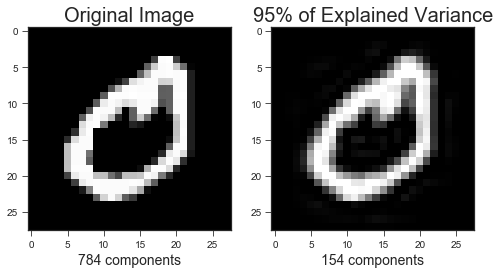

In [18]:
app95 = pca.inverse_transform(mnistPCA95)
plt.figure(figsize=(8,4))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(mnist.data[1].reshape(28,28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('784 components', fontsize = 14)
plt.title('Original Image', fontsize = 20)

# 154 principal components
plt.subplot(1, 2, 2);
plt.imshow(app95[1].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('154 components', fontsize = 14)
plt.title('95% of Explained Variance', fontsize = 20)

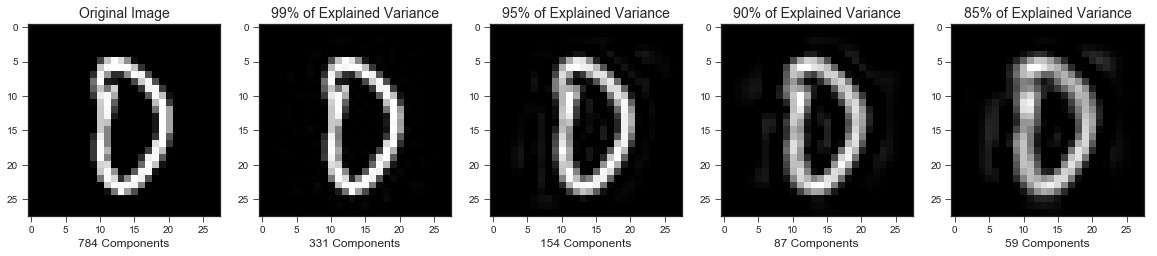

In [19]:
#Źródło: https://github.com/mGalarnyk/Python_Tutorials/blob/master/Sklearn/PCA/PCA_Image_Reconstruction_and_such.ipynb
from sklearn.decomposition import PCA

# This is an extremely inefficient function. Will get to why in a later tutorial
def explainedVariance(percentage, images): 
    # percentage should be a decimal from 0 to 1 
    pca = PCA(percentage)
    pca.fit(images)
    components = pca.transform(images)
    approxOriginal = pca.inverse_transform(components)
    return approxOriginal

plt.figure(figsize=(20,4))
number = 800
# Original Image (784 components)
plt.subplot(1, 5, 1);
plt.imshow(mnist.data[number].reshape(28,28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255))
plt.xlabel('784 Components', fontsize = 12)
plt.title('Original Image', fontsize = 14)

# 331 principal components
plt.subplot(1, 5, 2);
plt.imshow(explainedVariance(.99, mnist.data)[number].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255))
plt.xlabel('331 Components', fontsize = 12)
plt.title('99% of Explained Variance', fontsize = 14)

# 154 principal components
plt.subplot(1, 5, 3);
plt.imshow(explainedVariance(.95, mnist.data)[number].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255))
plt.xlabel('154 Components', fontsize = 12)
plt.title('95% of Explained Variance', fontsize = 14)

# 87 principal components
plt.subplot(1, 5, 4)
plt.imshow(explainedVariance(.90, mnist.data)[number].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255))
plt.xlabel('87 Components', fontsize = 12)
plt.title('90% of Explained Variance', fontsize = 14);

# 59 principal components
plt.subplot(1, 5, 5)
plt.imshow(explainedVariance(.85, mnist.data)[number].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('59 Components', fontsize = 12)
plt.title('85% of Explained Variance', fontsize = 14)

In [20]:
mnistDF = pd.DataFrame(mnist.data)
mnistDF = mnistDF.apply(lambda x: (x-x.mean()))
mnistDF = mnistDF.loc[:, mnistDF.std() > .1]
mnistDF.shape
mnistDF["target"] = mnist.target

In [21]:
pca = PCA(.9)
mnistPCA90 = pca.fit_transform(mnistDF.iloc[:, 0:-1])
dfPCA = pd.DataFrame(mnistPCA90, columns=["v_"+str(x) for x in range(mnistPCA90.shape[1])])
dfPCA["target"]  = mnist.target
print(pca.n_components_)
dfPCA = dfPCA.sample(4000)

87


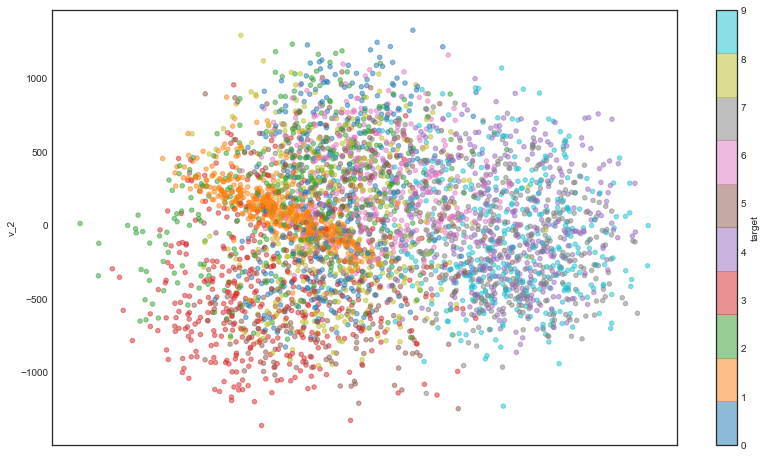

In [22]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
dfPCA.plot.scatter("v_1", "v_2", c="target", cmap="tab10",  alpha=0.5, figsize=(14,8))

Jak widać wykorzystanie PCA pozwala na pewną redukcję wymiarowości, ale trudno powiedzieć, żeby możliwa była łatwa separacja liczb nawet korzystając jedynie z pierwszych dwóch komponentów.

In [23]:
dfPCA.iloc[:,0:-1] = dfPCA.iloc[:,0:-1].apply(lambda x: (x-x.mean())/x.std())

Możemy spróbować przeprowadzić klastrowanie na podstawie wszystkich komponentów PCA z pomocą DBscan i sprawdzić czy pozwoli to na skuteczną separację nienadzorowaną. Wydaje się jednak, że dla żadnej kombinacji parametrów dbscan czy też liczby komponentów nie udaje się uzyskać sensownego wyniku.

In [43]:
from sklearn.cluster import DBSCAN
# db = DBSCAN(eps=11, min_samples=2).fit(dfPCA.iloc[:,0:-1])
db = DBSCAN(eps=3, min_samples=2).fit(dfPCA.iloc[:,0:10])
pd.crosstab(dfPCA.target, db.labels_)

col_0     0
target     
0.0     384
1.0     486
2.0     409
3.0     423
4.0     364
5.0     361
6.0     391
7.0     398
8.0     384
9.0     400

## t-Distributed Stochastic Neighbor Embedding (t-SNE)
t-SNE to unikalna metoda redukcji wymiarowości. Doskonale radzi sobie nawet z bardzo dużą liczbą wymiarów i redukuję ją do małej liczby (zwykle dwóch lub trzech wymiarów). Zrozumienie t-SNE wymaga dobrej znajomości matematyki i rachunku prawdopodobieństwa. Spróbujmy sobie to przybliżyć.

W pierwszej fazie przestrzeń wielowymiarowa zamieniana jest na macierz prawdopodobieństw warunkowych. Prawdopodobieństwo wybrania punktu $i$ pod warunkiem $j$ jest tym większe im mniejszy dystans pomiędzy punktami.

W drugiej fazie tworzona jest, początkowo losowa dwu (trzy) wymiarowa przestrzeń, której również przypisywane są prawdopodobieństwa warunkowe. 

Dalej, z pomocą optymalizacji numerycznej przestrzeń niskowymiarowa jest przetwarzana w celu minimalizacji różnic pomiędzy dwoma rozkładami prawdopodobieństw warunkowych.

Warto przeczytać:
* https://distill.pub/2016/misread-tsne/
* https://www.oreilly.com/learning/an-illustrated-introduction-to-the-t-sne-algorithm
* https://www.analyticsvidhya.com/blog/2017/01/t-sne-implementation-r-python/

In [25]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(dfPCA.iloc[:,0:-1])

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 4000 samples in 0.008s...
[t-SNE] Computed neighbors for 4000 samples in 2.153s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4000
[t-SNE] Computed conditional probabilities for sample 2000 / 4000
[t-SNE] Computed conditional probabilities for sample 3000 / 4000
[t-SNE] Computed conditional probabilities for sample 4000 / 4000
[t-SNE] Mean sigma: 3.004716
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.498276
[t-SNE] Error after 300 iterations: 2.792039


In [26]:
tsne2 = pd.DataFrame(tsne_results)
tsne2 = tsne2.apply(lambda x: (x-x.mean())/x.std())
tsne2["target"] = dfPCA.target.values


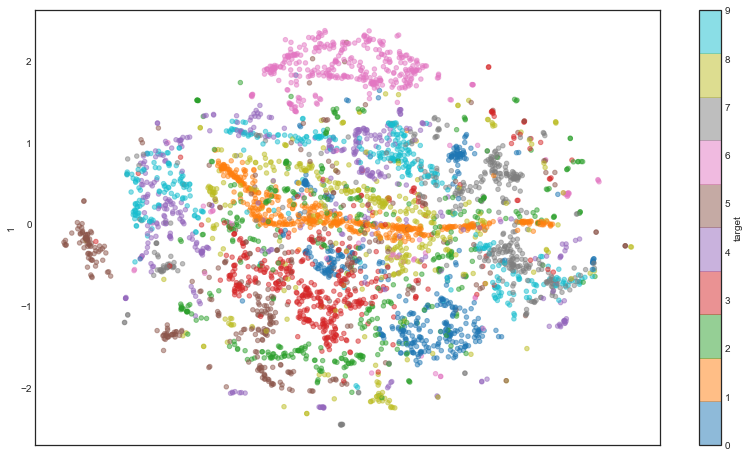

In [27]:
tsne2.plot.scatter(0, 1, c="target", cmap="tab10",  alpha=0.5, figsize=(14,8))

In [28]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=4, min_samples=2).fit(tsne2)
pd.crosstab(tsne2.target, db.labels_)

col_0     0
target     
0.0     384
1.0     486
2.0     409
3.0     423
4.0     364
5.0     361
6.0     391
7.0     398
8.0     384
9.0     400

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.172s...
[t-SNE] Computed neighbors for 5000 samples in 22.950s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 400.360931
[t-SNE] KL divergence after 250 iterations with early exaggeration: 88.716438
[t-SNE] Error after 500 iterations: 1.869219


col_0   -1    0    1    2    3    4    5    6    7    8    9    10   11
target                                                                 
0.0       2    0    0    0    0    0    0  505    0    0    0    5    0
1.0       1    0    0    0    0    0    0    0    0    0  553    0    0
2.0       1    0    0    0    0    0  483    0    0    0    0    0    2
3.0       0    0    0  489    0    0    0    0    0    0    0    0    0
4.0       1    0    0    0    0    0    0    0    0  495    0    0    0
5.0       0    0    0    0    0  447    0    0    0    0    0    0    0
6.0       1    0    0    0    0    0    0    0  518    0    0    0    0
7.0       0    0  538    0    0    0    0    0    0    0    0    0    0
8.0       0    0    0    0  468    0    0    0    0    0    0    0    0
9.0       0  491    0    0    0    0    0    0    0    0    0    0    0

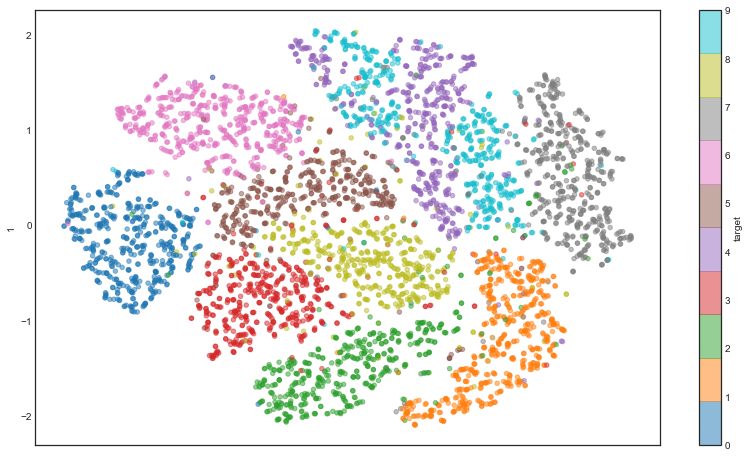

In [29]:
from sklearn.manifold import TSNE
mnistSample = mnistDF.sample(5000)
tsne = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=500)
tsne_results = tsne.fit_transform(mnistSample.iloc[:, 0:-1])
tsne2 = pd.DataFrame(tsne_results)
tsne2 = tsne2.apply(lambda x: (x-x.mean())/x.std())
tsne2["target"] = mnistSample.target.values
tsne2.plot.scatter(0, 1, c="target", cmap="tab10",  alpha=0.5, figsize=(14,8))

db = DBSCAN(eps=0.9, min_samples=2).fit(tsne2)
pd.crosstab(tsne2.target, db.labels_)

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.168s...
[t-SNE] Computed neighbors for 5000 samples in 23.208s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 464.295922
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.481422
[t-SNE] Error after 500 iterations: 1.738090


col_0   -1    0    1    2    3    4    5    6    7    8    9    10   11   12  \
target                                                                         
0.0       0    0    0  477    0    0    0    0    0    0    0    2    0    0   
1.0       1    0    0    0  560    0    0    0    0    0    0    0    0    0   
2.0       0    0    0    0    0  481    0    0    0    0    0    0    5    0   
3.0       0    0    0    0    0    0  511    0    0    0    0    0    0    0   
4.0       0    0    0    0    0    0    0    0    0  524    0    0    0    0   
5.0       2  445    0    0    0    0    0    0    0    0    0    0    0    0   
6.0       1    0    0    0    0    0    0    0    0    0  497    0    0    3   
7.0       0    0    0    0    0    0    0    0  511    0    0    0    0    0   
8.0       0    0    0    0    0    0    0  466    0    0    0    0    0    0   
9.0       1    0  507    0    0    0    0    0    0    0    0    0    0    0   

col_0    13   14  
target            
0.0       4    0  
1.0       0    0  
2.0       0    0  
3.0       0    0  
4.0       0    2  
5.0       0    0  
6.0       0    0  
7.0       0    0  
8.0       0    0  
9.0       0    0

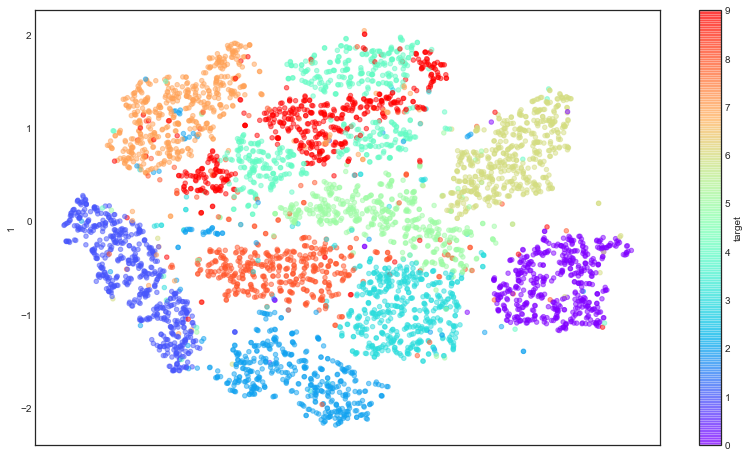

In [34]:
from sklearn.manifold import TSNE
mnistSample = mnistDF.sample(5000)
tsne = TSNE(n_components=2, verbose=1, perplexity=20, n_iter=500)
tsne_results = tsne.fit_transform(mnistSample.iloc[:, 0:-1])
tsne2 = pd.DataFrame(tsne_results)
tsne2 = tsne2.apply(lambda x: (x-x.mean())/x.std())
tsne2["target"] = mnistSample.target.values
tsne2.plot.scatter(0, 1, c="target", cmap="rainbow",  alpha=0.5, figsize=(14,8))


db = DBSCAN(eps=0.9, min_samples=2).fit(tsne2)
pd.crosstab(tsne2.target, db.labels_)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.189s...
[t-SNE] Computed neighbors for 5000 samples in 23.315s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 473.655251
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.769104
[t-SNE] Error after 500 iterations: 1.618440


col_0   -1    0    1    2    3    4    5    6    7    8    9    10
target                                                            
0.0       2    0    0    0    0    0    0    0  474    0    0    0
1.0       0  591    0    0    0    0    0    0    0    0    0    0
2.0       0    0    0    0    0  476    0    0    0    0    0    0
3.0       0    0    0    0    0    0    0  505    0    0    0    0
4.0       0    0    0  507    0    0    0    0    0    0    0    0
5.0       1    0    0    0    0    0    0    0    0    0  429    0
6.0       1    0    0    0    0    0    0    0    0  501    0    3
7.0       0    0    0    0    0    0  497    0    0    0    0    0
8.0       0    0  528    0    0    0    0    0    0    0    0    0
9.0       0    0    0    0  485    0    0    0    0    0    0    0

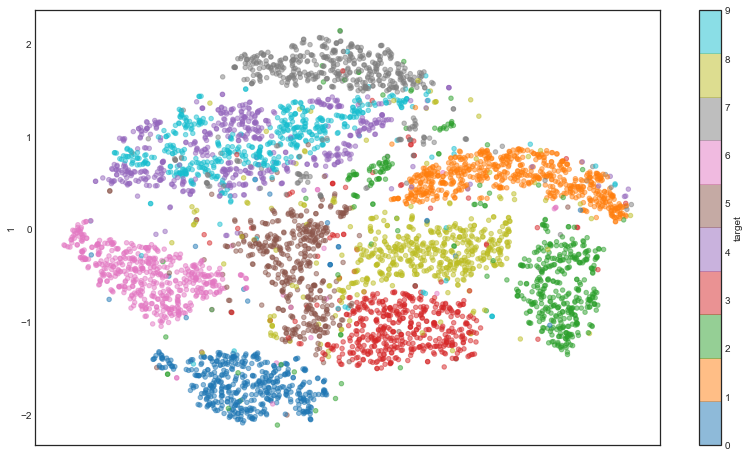

In [31]:
from sklearn.manifold import TSNE
mnistSample = mnistDF.sample(5000)
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=500)
tsne_results = tsne.fit_transform(mnistSample.iloc[:, 0:-1])
tsne2 = pd.DataFrame(tsne_results)
tsne2 = tsne2.apply(lambda x: (x-x.mean())/x.std())
tsne2["target"] = mnistSample.target.values
tsne2.plot.scatter(0, 1, c="target", cmap="tab10",  alpha=0.5, figsize=(14,8))


db = DBSCAN(eps=0.9, min_samples=2).fit(tsne2)
pd.crosstab(tsne2.target, db.labels_)

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.161s...
[t-SNE] Computed neighbors for 5000 samples in 22.727s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 400.635491
[t-SNE] KL divergence after 250 iterations with early exaggeration: 88.058922
[t-SNE] Error after 500 iterations: 1.544751


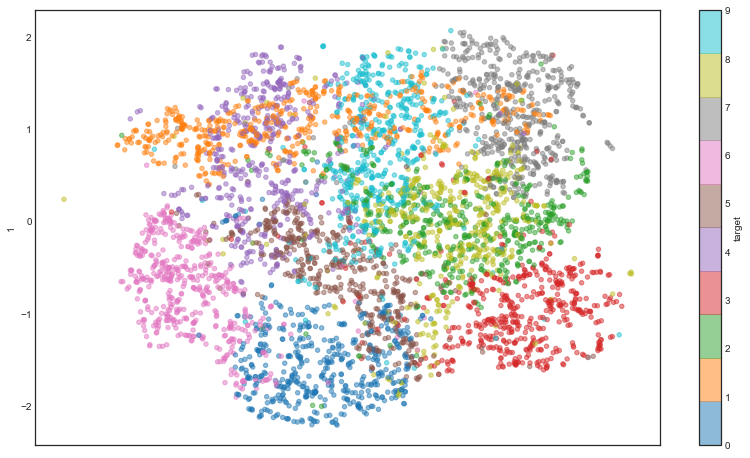

In [32]:
from sklearn.manifold import TSNE
mnistSample = mnistDF.sample(5000)
tsne = TSNE(n_components=3, verbose=1, perplexity=10, n_iter=500)
tsne_results = tsne.fit_transform(mnistSample.iloc[:, 0:-1])
tsne2 = pd.DataFrame(tsne_results)
tsne2 = tsne2.apply(lambda x: (x-x.mean())/x.std())
tsne2["target"] = mnistSample.target.values
tsne2.plot.scatter(0, 1, c="target", cmap="tab10",  alpha=0.5, figsize=(14,8))

In [33]:
db = DBSCAN(eps=1, min_samples=2).fit(tsne2)
pd.crosstab(tsne2.target, db.labels_)

col_0   -1    0    1    2    3    4    5    6    7    8    9    10   11   12  \
target                                                                         
0.0       3    0  482    0    0    0    0    0    0    0    0    0    0    8   
1.0       0    0    0    0    0    0    0    0    0    0  534    0    0    0   
2.0       2  495    0    0    0    0    0    0    0    0    0    0    0    0   
3.0       2    0    0    0    0    0    0    0    0  495    0    0    0    0   
4.0       1    0    0    0    0    0    0  504    0    0    0    2    0    0   
5.0       1    0    0    0    0  447    0    0    0    0    0    0    0    0   
6.0       3    0    0    0    0    0  488    0    0    0    0    0    0    0   
7.0       2    0    0    0    0    0    0    0  496    0    0    0    0    0   
8.0       2    0    0    0  499    0    0    0    0    0    0    0    0    0   
9.0       3    0    0  513    0    0    0    0    0    0    0    0    2    0   

col_0    13   14   15   16   17   18  
target                                
0.0       0    0    0    0    0    0  
1.0       0    0    0    0    0    2  
2.0       2    0    0    0    0    0  
3.0       0    0    0    0    0    0  
4.0       0    0    0    0    0    0  
5.0       0    0    0    0    2    0  
6.0       0    0    0    0    0    0  
7.0       0    0    0    3    0    0  
8.0       0    4    0    0    0    0  
9.0       0    0    3    0    0    0

Niestety, chociaż skuteczność t-SNE wydaje się być ogromna nie jest to niestety narzędzie, które może mocno wspomagać modele predykcyjne. Ze względu na sposób tworzenia przestrzeni niskowymiarowej nie możemy "dokształcać" nowych punktów bez przechodzenia przez całą procedurę od początku.